# Rutherford Scattering



In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [9]:

#For space correction
def N(x,n):
    x = np.deg2rad(x)
    return 2*(np.pi*np.sin(x))*n

l = np.array([(30, 0.157),(25, 0.337), (20, 1.3015),(15,7.17),(10,22.343),(5,35.045),(5,32.85),(10,18.793),(15,4.16),(20,0.8225),(25,0.208),(30,0.107)])

for i in range(len(l)):
    print(f"n = {l[i][1]}, x = {l[i][0]}, N(x,n) = {N(l[i][0], l[i][1])}")

n = 0.157, x = 30.0, N(x,n) = 0.49323004661359743
n = 0.337, x = 25.0, N(x,n) = 0.8948660433649347
n = 1.3015, x = 20.0, N(x,n) = 2.796892185003242
n = 7.17, x = 15.0, N(x,n) = 11.659911513483951
n = 22.343, x = 10.0, N(x,n) = 24.377635769515706
n = 35.045, x = 5.0, N(x,n) = 19.191191585096416
n = 32.85, x = 5.0, N(x,n) = 17.989175162517256
n = 18.793, x = 10.0, N(x,n) = 20.504359710715153
n = 4.16, x = 15.0, N(x,n) = 6.765025369050662
n = 0.8225, x = 20.0, N(x,n) = 1.7675327100769624
n = 0.208, x = 25.0, N(x,n) = 0.5523208813647074
n = 0.107, x = 30.0, N(x,n) = 0.33615041393410783


A = 0.0605579 ± 0.159222
B = -1.8926 ± 0.372105
A = 0.115296 ± 0.0850722
B = 3.16304 ± 0.107448


C:\Users\Aryan Shrivastava\AppData\Local\Temp\ipykernel_9728\622270757.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


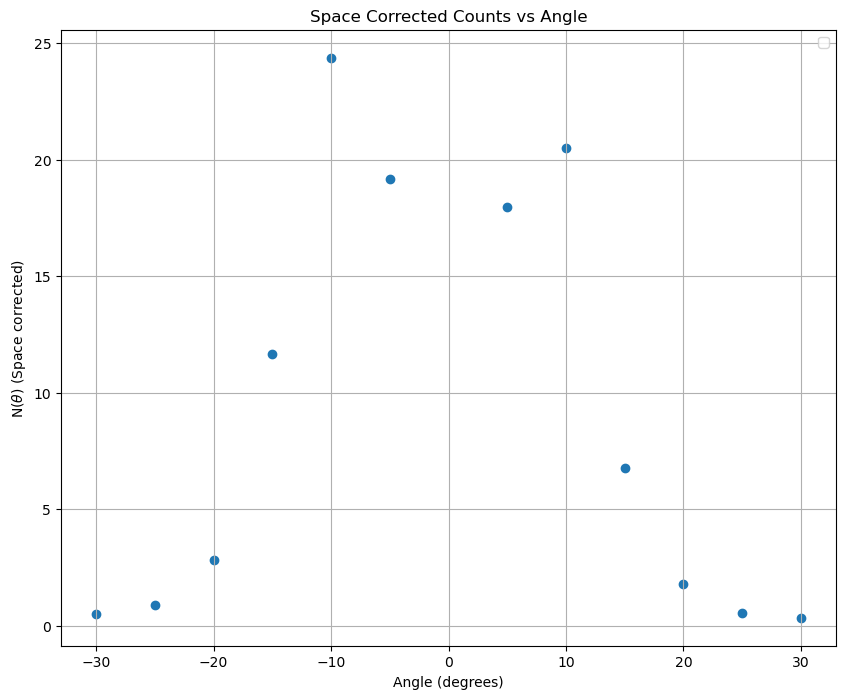

In [10]:
x = np.array([-30, -25, -20, -15, -10, -5, 5, 10, 15, 20, 25, 30])
y = np.array([0.49323004661359743, 0.8948660433649347, 2.796892185003242, 11.659911513483951, 24.377635769515706, 19.191191585096416, 17.989175162517256, 20.504359710715153, 6.765025369050662,  1.7675327100769624,0.5523208813647074, 0.33615041393410783])

x1 = x[:6] 
y1 = y[:6]
x2 = x[6:]
y2 = y[6:]

#Fitting the data to the function f(x) = A/sin^4((x-B)/2)
def f(x, A, B):
    return A/(np.sin((x - B)/2)**4)

A0 =  1e-5    # rough guess
B0 = 0.01    # rough guess
p0 = [A0, B0]


popt, pcov = curve_fit(f, x1, y1, p0=p0, maxfev=10000)

A_fit, B_fit = popt
A_err, B_err = np.sqrt(np.diag(pcov))

print(f"A = {A_fit:.6g} ± {A_err:.6g}")
print(f"B = {B_fit:.6g} ± {B_err:.6g}")


A01 =  1e-5    # rough guess
B01 = 0.01    # rough guess
p01 = [A01, B01]


popt1, pcov1 = curve_fit(f, x2, y2, p0=p01, maxfev=10000)

A_fit1, B_fit1 = popt1
A_err1, B_err1 = np.sqrt(np.diag(pcov1))

print(f"A = {A_fit1:.6g} ± {A_err1:.6g}")
print(f"B = {B_fit1:.6g} ± {B_err1:.6g}")

# ---- Plot to check fit ----
x_fit1 = np.linspace(np.min(x),-5 , 1000) 
x_fit2 = np.linspace(5, np.max(x), 1000)
x_fit = np.concatenate((x_fit1, x_fit2))
y_fit = f(x_fit1, A_fit, B_fit)
y_fit1 = f(x_fit2, A_fit1, B_fit1)

plt.figure(figsize=(10, 8))
plt.scatter(x, y)
#plt.plot(x_fit1, y_fit, 'r-', label=f'Fit: A={A_fit:.2e}, B={B_fit:.2f}')
#plt.plot(x_fit2, y_fit1, 'r-', label=f'Fit: A={A_fit1:.2e}, B={B_fit1:.2f}')
plt.xlabel('Angle (degrees)')
plt.ylabel('N($\\theta$) (Space corrected)')
plt.title('Space Corrected Counts vs Angle')
plt.grid()
plt.legend()
plt.show()



Negative side fit:
  A = 0.296909 ± 0.493414
  B = 34.2156 ± 18.3458

Positive side fit:
  A = 0.14394 ± 0.229678
  B = -28.4703 ± 14.741


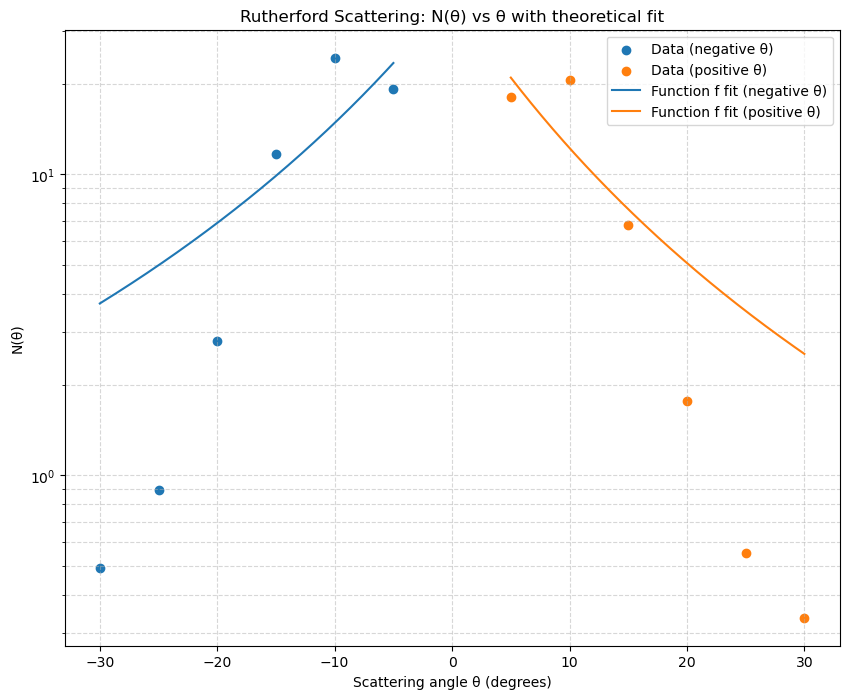

In [11]:
x = np.array([-30, -25, -20, -15, -10, -5, 5, 10, 15, 20, 25, 30], dtype=float)
y = np.array([
    0.49323004661359743, 0.8948660433649347, 2.796892185003242,
    11.659911513483951, 24.377635769515706, 19.191191585096416,
    17.989175162517256, 20.504359710715153, 6.765025369050662,
    1.7675327100769624, 0.5523208813647074, 0.33615041393410783
], dtype=float)


# Model: f(theta) = A / sin^4((theta - B)/2)
# Notice: theta must be in radians for np.sin

def f(theta_deg, A, B):
    theta = np.deg2rad(theta_deg)   # convert degrees -> radians
    B_rad = np.deg2rad(B)
    return A / (np.sin((theta - B_rad)/2.0)**4)


# Spliting for separate fitting in negative and positive theta 

mask_neg = x < 0
mask_pos = x > 0
x_neg, y_neg = x[mask_neg], y[mask_neg]
x_pos, y_pos = x[mask_pos], y[mask_pos]

p0_neg = [1.0, 0.0]   
p0_pos = [1.0, 0.0]
popt_neg, pcov_neg = curve_fit(f, x_neg, y_neg, p0=p0_neg, maxfev=20000)
popt_pos, pcov_pos = curve_fit(f, x_pos, y_pos, p0=p0_pos, maxfev=20000)

A_neg, B_neg = popt_neg
A_pos, B_pos = popt_pos

err_neg = np.sqrt(np.diag(pcov_neg))
err_pos = np.sqrt(np.diag(pcov_pos))

print("Negative side fit:")
print(f"  A = {A_neg:.6g} ± {err_neg[0]:.6g}")
print(f"  B = {B_neg:.6g} ± {err_neg[1]:.6g}")

print("\nPositive side fit:")
print(f"  A = {A_pos:.6g} ± {err_pos[0]:.6g}")
print(f"  B = {B_pos:.6g} ± {err_pos[1]:.6g}")

theta_plot_neg = np.linspace(np.min(x_neg), np.max(x_neg), 400)
theta_plot_pos = np.linspace(np.min(x_pos), np.max(x_pos), 400)

plt.figure(figsize=(10,8))

plt.scatter(x_neg, y_neg, label="Data (negative θ)")
plt.scatter(x_pos, y_pos, label="Data (positive θ)")
plt.plot(theta_plot_neg, f(theta_plot_neg, A_neg, B_neg), label="Function f fit (negative θ)")
plt.plot(theta_plot_pos, f(theta_plot_pos, A_pos, B_pos), label="Function f fit (positive θ)")
plt.title("Rutherford Scattering: N(θ) vs θ with theoretical fit")
plt.yscale("log")  
plt.xlabel("Scattering angle θ (degrees)")
plt.ylabel("N(θ)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


Global fit (all data):
  A = 7.25089e-05 ± 2.67472e-05
  B = -0.03922 ± 0.461842  degrees


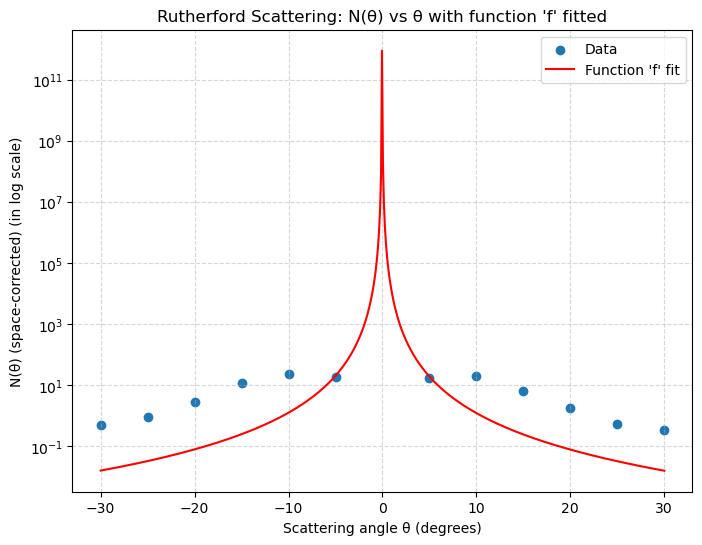

In [18]:
# -------------------------
# Your data
# -------------------------
x = np.array([-30, -25, -20, -15, -10, -5, 5, 10, 15, 20, 25, 30], dtype=float)
y = np.array([
    0.49323004661359743, 0.8948660433649347, 2.796892185003242,
    11.659911513483951, 24.377635769515706, 19.191191585096416,
    17.989175162517256, 20.504359710715153, 6.765025369050662,
    1.7675327100769624, 0.5523208813647074, 0.33615041393410783
], dtype=float)

# -------------------------
# Model: f(theta) = A / sin^4((theta - B)/2)
# theta and B are in DEGREES (converted to radians inside)
# -------------------------
def f(theta_deg, A, B_deg):
    theta = np.deg2rad(theta_deg)
    B = np.deg2rad(B_deg)
    return A / (np.sin((theta - B)/2.0)**4)

# -------------------------
# Initial guesses
# -------------------------
p0 = [1.0, 0.0]   # [A, B in degrees]

# -------------------------
# Fit all data at once
# -------------------------
popt, pcov = curve_fit(f, x, y, p0=p0, maxfev=20000)

A_fit, B_fit = popt
perr = np.sqrt(np.diag(pcov))

A_err, B_err = perr

print("Global fit (all data):")
print(f"  A = {A_fit:.6g} ± {A_err:.6g}")
print(f"  B = {B_fit:.6g} ± {B_err:.6g}  degrees")

# -------------------------
# Plot
# -------------------------
theta_plot = np.linspace(np.min(x), np.max(x), 600)

plt.figure(figsize=(8,6))

plt.scatter(x, y, label="Data")
plt.plot(theta_plot, f(theta_plot, A_fit, B_fit), label="Function 'f' fit", color='red')

plt.yscale("log")  # Rutherford-style plot
plt.xlabel("Scattering angle θ (degrees)")
plt.ylabel("N(θ) (space-corrected) (in log scale)")
plt.title("Rutherford Scattering: N(θ) vs θ with function 'f' fitted")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


In [19]:
print(N(15,0.442))
print(N(15,0.262))
print(N(15,0.062))
print(N(15,0.031))

0.7187839454616328
0.42606650160847914
0.10082489732719735
0.050412448663598675
